In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  AdaBoostClassifier
from xgboost import XGBRFClassifier
from xgboost import XGBClassifier

from sklearn.metrics import auc,roc_curve
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df=pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.drop('customerID',axis=1,inplace=True)

In [5]:
for i in df.columns:
    print(df[i].value_counts())
    print('____________________')

Male      3555
Female    3488
Name: gender, dtype: int64
____________________
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
____________________
No     3641
Yes    3402
Name: Partner, dtype: int64
____________________
No     4933
Yes    2110
Name: Dependents, dtype: int64
____________________
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
____________________
Yes    6361
No      682
Name: PhoneService, dtype: int64
____________________
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
____________________
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
____________________
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
____________________
No                     3088
Yes                    2429
No inte

In [6]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df['TotalCharges'].loc[488]

' '

In [9]:
df=df[df['TotalCharges']!=' ']

In [10]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df['TotalCharges']=df['TotalCharges'].astype('float')

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
df['MultipleLines']=df['MultipleLines'].replace('No phone service','No')

In [14]:
convert=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [15]:
for i in convert:
    df[i]=df[i].replace('No internet service','No')

In [16]:
for i in df.columns:
    print(df[i].value_counts())
    print('____________________')

Male      3549
Female    3483
Name: gender, dtype: int64
____________________
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
____________________
No     3639
Yes    3393
Name: Partner, dtype: int64
____________________
No     4933
Yes    2099
Name: Dependents, dtype: int64
____________________
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64
____________________
Yes    6352
No      680
Name: PhoneService, dtype: int64
____________________
No     4065
Yes    2967
Name: MultipleLines, dtype: int64
____________________
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
____________________
No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64
____________________
No     4607
Yes    2425
Name: OnlineBackup, dtype: int64
____________________
No     4614
Yes    2418
Name: DeviceProtection, dtype: int64
____________________
No     4992
Ye

In [17]:
yes_col=['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [18]:
for i in yes_col:
    df[i]=df[i].replace({'Yes':1,'No':0})

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [20]:
df['gender']=df['gender'].replace({'Female':1,'Male':0})

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [22]:
df=pd.get_dummies(df,columns=['InternetService','Contract','PaymentMethod'],drop_first=True)

In [23]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,1,0,1,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,0,1,1,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,0,1,0,0,0,0,1


In [24]:
y=df['Churn']
x=df.drop('Churn',axis=1)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25,stratify=y)

In [26]:
scaler=MinMaxScaler()

In [27]:
x_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])
x_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(x_test[['tenure','MonthlyCharges','TotalCharges']])

<ipython-input-27-3d07bab50607>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])
C:\Users\BHUPESH\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-27-3d07bab50607>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [28]:
models= ({'Logistic_regression':LogisticRegression(),
       'Decesion_tree':DecisionTreeClassifier(),
       'K-neighbors':KNeighborsClassifier(),
       'Random forest':RandomForestClassifier(),
       'Adaboost':AdaBoostClassifier(),
       'xgboost':XGBClassifier(),
       'Random_xgb':XGBRFClassifier()})

train_score={}
test_score={}

for name,model in models.items():
    model.fit(x_train,y_train)
    train_score[name]= model.score(x_train,y_train)
    test_score[name]= model.score(x_test,y_test)

C:\Users\BHUPESH\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:58:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [29]:
train_score

{'Logistic_regression': 0.8028062191884717,
 'Decesion_tree': 0.997535077739856,
 'K-neighbors': 0.8339021615472128,
 'Random forest': 0.9973454683352294,
 'Adaboost': 0.8090633295411452,
 'xgboost': 0.9423587409935533,
 'Random_xgb': 0.8172165339400834}

In [30]:
test_score

{'Logistic_regression': 0.810580204778157,
 'Decesion_tree': 0.7229806598407281,
 'K-neighbors': 0.7616609783845278,
 'Random forest': 0.8037542662116041,
 'Adaboost': 0.8134243458475541,
 'xgboost': 0.7844141069397043,
 'Random_xgb': 0.8111490329920364}

In [31]:
result=pd.DataFrame(train_score,index=['train_score'])
result=result.T
result['test_score']=test_score.values()
result['differences']=result['train_score']-result['test_score']
result

,train_score,test_score,differences
Logistic_regression,0.802806,0.810580,-0.007774
Decesion_tree,0.997535,0.722981,0.274554
K-neighbors,0.833902,0.761661,0.072241
Random forest,0.997345,0.803754,0.193591
Adaboost,0.809063,0.813424,-0.004361
xgboost,0.942359,0.784414,0.157945
Random_xgb,0.817217,0.811149,0.006068


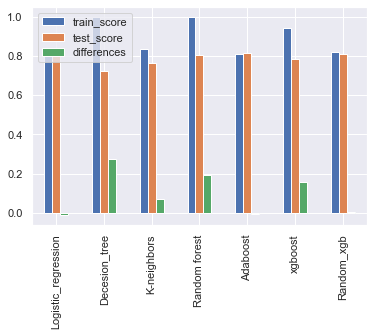

In [32]:
result.plot.bar();

In [33]:
lr=LogisticRegression()

In [34]:
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
lr.score(x_test,y_test)

0.810580204778157

In [36]:
y_pred=lr.predict(x_test)
y_prob=lr.predict_proba(x_test)

Roc_curve: 0.8429051728570552


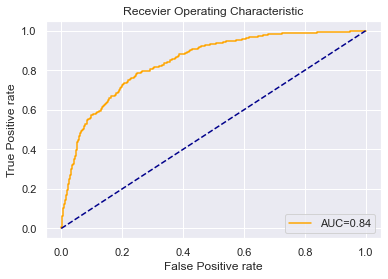

In [37]:
positive_prob=y_prob[:,1]
fpr,tpr,threshold= roc_curve(y_test,positive_prob)
roc_auc= auc(fpr,tpr)
print('Roc_curve:',roc_auc)
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate');

In [38]:
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print('confusion_matrix')
print(cm)
print('\n')
print('classification_report')
print(cr)

confusion_matrix
[[1158  133]
 [ 200  267]]


classification_report
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1291
           1       0.67      0.57      0.62       467

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.75      1758
weighted avg       0.80      0.81      0.81      1758



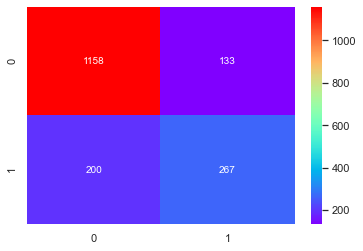

In [39]:
sns.heatmap(cm,annot=True,fmt='d',cmap='rainbow');

In [40]:
prediction=pd.DataFrame()
prediction['y_true']=y_test.values
prediction['y_pred']=y_pred

In [41]:
prediction.value_counts()

y_true  y_pred
0       0         1158
1       1          267
        0          200
0       1          133
dtype: int64